## Content Based Recommender System

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Preprocessing</a></li>
<li><a href="#eda"> Exploratory Data Analysis (EDA)</a></li>
<li><a href="#con"> Conclusion</a></li>
</ul>

## Importing Libraries

In [1]:
pip show pandas

Name: pandas
Version: 2.0.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distrib

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for visualization
import plotly.express as px # for visualization
import matplotlib.pyplot as plt # for visualization
color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline

# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [3]:
movies = pd.read_csv('data/tmdb_5000_movies.csv')
credits = pd.read_csv('data/tmdb_5000_credits.csv')

In [4]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
movies.shape

(4803, 20)

In [6]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
credits.shape

(4803, 4)

In [8]:
movies = movies.merge(credits,on='title')

In [9]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [10]:
movies.shape

(4809, 23)

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

### Numerical Summary

In [12]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


* Budget:

- The mean budget for movies is approximately $29,027,800.
- The minimum budget for a movie is $0, which indicates that some movies had no reported budget.
- The maximum budget for a movie is a substantial $380,000,000, suggesting a wide range of budget levels in the dataset.
- The 25th percentile budget is $780,000, while the 75th percentile budget is $40,000,000, indicating that most movies fall within this budget range.

* Popularity:

- The mean popularity score for movies is approximately 57,120.57.
- The minimum popularity score is 5, which indicates that even less popular movies are present in the dataset.
- The maximum popularity score is quite high at 459,488, suggesting that some movies are extremely popular.
- The 25th percentile popularity score is 9,012, while the 75th percentile score is 58,595, indicating a wide range in the popularity of movies.


* Revenue:

- The mean revenue for movies is approximately $21,491,664.
- The minimum revenue is $0, indicating that some movies did not generate any revenue.
- The maximum revenue is a substantial $2,787,965,000, indicating a wide variation in revenue among movies.
- The 25th percentile revenue is approximately $4,667,230, and the 75th percentile revenue is approximately $28,350,529.

* Runtime:

- The mean runtime for movies is approximately 106.88 minutes.
- The minimum runtime is 0 minutes, which is likely an error or missing data.
- The maximum runtime is 338 minutes, suggesting a wide range in the duration of movies.
- The 25th percentile runtime is 94 minutes, and the 75th percentile runtime is 118 minutes.

* Vote Average:

- The mean vote average for movies is approximately 6.09.
- The minimum vote average is 0, which is unusual and might indicate missing or incorrect data.
- The maximum vote average is 10, suggesting a wide range in the quality or rating of movies.
- The 25th percentile vote average is 5.60, and the 75th percentile vote average is 6.80.

* Vote Count:

- The mean vote count for movies is approximately 690.33.
- The minimum vote count is 0, which might indicate missing data or very unpopular movies.
- The maximum vote count is 13,752, indicating a wide range in the number of votes received.
- The 25th percentile vote count is 54, and the 75th percentile vote count is 737.

In [13]:
print('Total number of datapoints:',len(movies))
print('Shape of the dataset:',movies.shape)

Total number of datapoints: 4809
Shape of the dataset: (4809, 23)


In [14]:
print('Checking for Null values in the dataframe:','\n',movies.isnull().sum(),'\n')

Checking for Null values in the dataframe: 
 budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64 



In [15]:
movies.dropna(inplace=True)

In [16]:
movies.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
movie_id                0
cast                    0
crew                    0
dtype: int64

In [17]:
movies.duplicated().sum()

0

In [18]:
cols_to_drop=['homepage','status','spoken_languages']
movies.drop(cols_to_drop,axis=1,inplace=True)

In [19]:
# Converting 'release_date' column to datetime 
movies['release_date'] = pd.to_datetime(movies['release_date'])

# Extracting only the year from 'release_date' and store it in a new column 'release_year'
movies['year'] = movies['release_date'].dt.year
movies.drop('release_date',axis=1, inplace=True)

In [20]:
# Representating budget and revenue in million format
movies['budget']=movies['budget']/1000000
movies['revenue']=movies['revenue']/1000000

In [21]:
# handle keywords
movies.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [22]:
# handle keywords
movies.iloc[0]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

### So we have to convert these columns into proper Format

In [23]:
import ast
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [24]:
movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)
movies['production_companies'] = movies['production_companies'].apply(convert)
movies['production_countries'] = movies['production_countries'].apply(convert)

In [25]:
# handle cast
movies.iloc[0]['cast']

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [26]:
movies['cast'] = movies['cast'].apply(convert)
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [27]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [28]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [29]:
movies.rename(columns={'crew':'director'},inplace=True)

In [30]:
# Function to collapse the list into a comma-separated string
def collapse(lst):
    return ','.join(lst)

In [31]:
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)
movies['production_companies'] = movies['production_companies'].apply(collapse)
movies['production_countries'] = movies['production_countries'].apply(collapse)
movies['cast'] = movies['cast'].apply(collapse)
movies['director'] = movies['director'].apply(collapse)

In [32]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,tagline,title,vote_average,vote_count,movie_id,cast,director,year
0,237.0,"Action,Adventure,Fantasy,Science Fiction",19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2787.965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington,Zoe Saldana,Sigourney Weaver",James Cameron,2009
1,300.0,"Adventure,Fantasy,Action",285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,961.000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp,Orlando Bloom,Keira Knightley",Gore Verbinski,2007
2,245.0,"Action,Adventure,Crime",206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",880.674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig,Christoph Waltz,Léa Seydoux",Sam Mendes,2015
3,250.0,"Action,Crime,Drama,Thriller",49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,1084.939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale,Michael Caine,Gary Oldman",Christopher Nolan,2012
4,260.0,"Action,Adventure,Science Fiction",49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,284.139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch,Lynn Collins,Samantha Morton",Andrew Stanton,2012


In [33]:
movies.iloc[0]['tagline']

'Enter the World of Pandora.'

## Categorical Summary

In [34]:
movies[movies.dtypes[movies.dtypes == 'object'].index].describe()

,genres,keywords,original_language,original_title,overview,production_companies,production_countries,tagline,title,cast,director
count,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494
unique,555,1414,22,1493,1493,1311,203,1488,1493,1460,951
top,Drama,,en,괴물,Gang-du is a dim-witted man working at his fat...,,United States of America,One ordinary couple. One little white lie.,The Host,"Jennifer Lawrence,Josh Hutcherson,Liam Hemsworth",Steven Spielberg
freq,91,61,1435,2,2,41,936,2,2,4,13


* Genres:

- There are 1,494 unique entries in the 'genres' column, indicating a variety of movie genres.
- The most frequent genre is 'Drama,' appearing 91 times in the dataset.

* Keywords:

- There are 1,414 unique entries in the 'keywords' column.
- The most common keyword appears 61 times in the dataset.


* Original Language:

- There are 22 unique original languages in the 'original_language' column.
- The most frequently occurring language is 'en' (English), appearing 1,435 times.

* Overview:

- There are 1,494 unique overviews in the 'overview' column.
- There are two entries with missing or empty overviews.
- All other overviews are unique.

* Production Companies:

- There are 1,311 unique production companies in the 'production_companies' column.
- The production company with the highest frequency appears 936 times in the dataset.

* Production Countries:

- There are 203 unique production countries in the 'production_countries' column.
- The most common production country is 'United States of America,' appearing 41 times.

*  Tagline:

- There are 1,488 unique taglines in the 'tagline' column.
- Two entries have missing or empty taglines.
- The most common tagline appears twice in the dataset: "One ordinary couple. One little white lie."

* Title:

- There are 1,493 unique movie titles in the 'title' column.
- Two entries have titles that appear twice in the dataset.

* Cast:

- There are 1,460 unique combinations of cast members in the 'cast' column.
- The most common combination of cast members appears four times in the dataset.

* Director:

- There are 951 unique directors in the 'director' column.
- The most frequent director is 'Steven Spielberg,' appearing 13 times in the dataset.

###  Exploratory Data Analysis

In [35]:
data_for_analysis=movies.copy()

In [36]:
# Extract the first value from the comma-separated values in below columns

data_for_analysis['main_genre'] = data_for_analysis['genres'].str.split(',').str[0]
data_for_analysis['main_production_country'] = data_for_analysis['production_countries'].str.split(',').str[0]
data_for_analysis['main_production_company'] = data_for_analysis['production_companies'].str.split(',').str[0]
data_for_analysis['main_actor'] = data_for_analysis['cast'].str.split(',').str[0]
data_for_analysis['supporting_actor'] = data_for_analysis['cast'].str.split(',').str[1]

In [37]:
data_for_analysis.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,tagline,title,vote_average,vote_count,movie_id,cast,director,year,main_genre,main_production_country,main_production_company,main_actor,supporting_actor
0,237.0,"Action,Adventure,Fantasy,Science Fiction",19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2787.965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington,Zoe Saldana,Sigourney Weaver",James Cameron,2009,Action,United States of America,Ingenious Film Partners,Sam Worthington,Zoe Saldana
1,300.0,"Adventure,Fantasy,Action",285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,961.000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp,Orlando Bloom,Keira Knightley",Gore Verbinski,2007,Adventure,United States of America,Walt Disney Pictures,Johnny Depp,Orlando Bloom
2,245.0,"Action,Adventure,Crime",206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",880.674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig,Christoph Waltz,Léa Seydoux",Sam Mendes,2015,Action,United Kingdom,Columbia Pictures,Daniel Craig,Christoph Waltz
3,250.0,"Action,Crime,Drama,Thriller",49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,1084.939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale,Michael Caine,Gary Oldman",Christopher Nolan,2012,Action,United States of America,Legendary Pictures,Christian Bale,Michael Caine
4,260.0,"Action,Adventure,Science Fiction",49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,284.139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch,Lynn Collins,Samantha Morton",Andrew Stanton,2012,Action,United States of America,Walt Disney Pictures,Taylor Kitsch,Lynn Collins


In [38]:
#setting custom palette
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

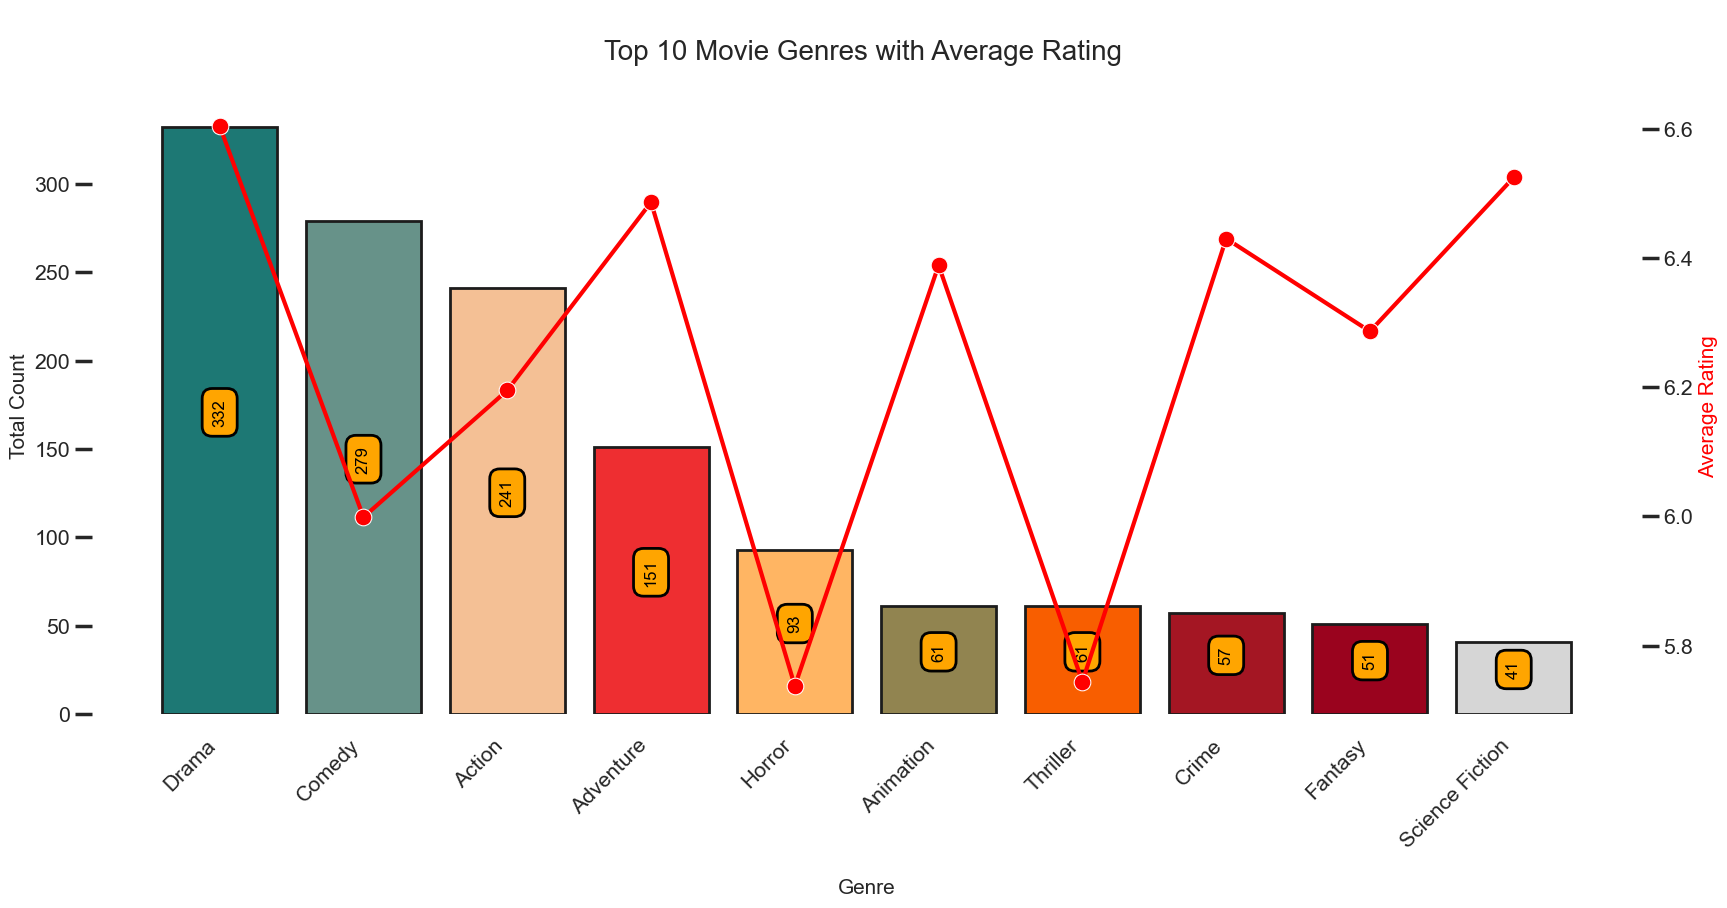

In [39]:
# Create a new DataFrame to count genre occurrences
genre_counts = data_for_analysis['main_genre'].str.split(', ', expand=True).stack().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Sort the genres based on the count in descending order
genre_counts = genre_counts.sort_values(by='Count', ascending=False)

# Calculate average rating for each genre
genre_ratings = data_for_analysis.groupby('main_genre')['vote_average'].mean().reset_index()

# Merge count and average rating data
genre_data = genre_counts.merge(genre_ratings, left_on='Genre', right_on='main_genre', how='left')

# Get the top 10 genres
genre_data = genre_data.head(10)

# Plot the bar chart
plt.subplots(figsize=(20, 8))
rating_barplot = sns.barplot(x=genre_data['Genre'], y=genre_data['Count'], palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=2)
rating_barplot.axes.set_title("\nTop 10 Movie Genres with Average Rating \n", fontsize=20)
plt.ylabel("Total Count", fontsize=15)
plt.xlabel("\nGenre", fontsize=15)
plt.xticks(rotation=45, ha='right')

# Add labels to the center of each count bar
for container in rating_barplot.containers:
    rating_barplot.bar_label(container, label_type="center", padding=6, size=12, color="black", rotation=90,
                bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

# Plotting the average ratings as a secondary y-axis
rating_barplot2 = rating_barplot.twinx()
sns.lineplot(x=genre_data['Genre'], y=genre_data['vote_average'], color='red', marker='o', ax=rating_barplot2)
rating_barplot2.set_ylabel("Average Rating", fontsize=15, color='red')

sns.despine(left=True, bottom=True)
plt.show()

In [40]:
import pandas as pd

# Create a new DataFrame to count genre occurrences
genre_counts = data_for_analysis['main_genre'].str.split(', ', expand=True).stack().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Sort the genres based on the count in descending order
genre_counts = genre_counts.sort_values(by='Count', ascending=False)

# Calculate average rating for each genre
genre_ratings = data_for_analysis.groupby('main_genre')['vote_average'].mean().reset_index()

# Merge count and average rating data
genre_data = genre_counts.merge(genre_ratings, left_on='Genre', right_on='main_genre', how='left')

# Get the top 10 genres
genre_data = genre_data.head(20)

# Display the result as a table
print(genre_data)

              Genre  Count       main_genre  vote_average
0             Drama    332            Drama      6.603916
1            Comedy    279           Comedy      5.998925
2            Action    241           Action      6.195021
3         Adventure    151        Adventure      6.486093
4            Horror     93           Horror      5.737634
5         Animation     61        Animation      6.388525
6          Thriller     61         Thriller      5.744262
7             Crime     57            Crime      6.429825
8           Fantasy     51          Fantasy      6.286275
9   Science Fiction     41  Science Fiction      6.524390
10          Romance     38          Romance      6.297368
11      Documentary     27      Documentary      6.514815
12           Family     21           Family      6.142857
13          Mystery     13          Mystery      6.569231
14          History      8          History      6.475000
15            Music      7            Music      6.600000
16            

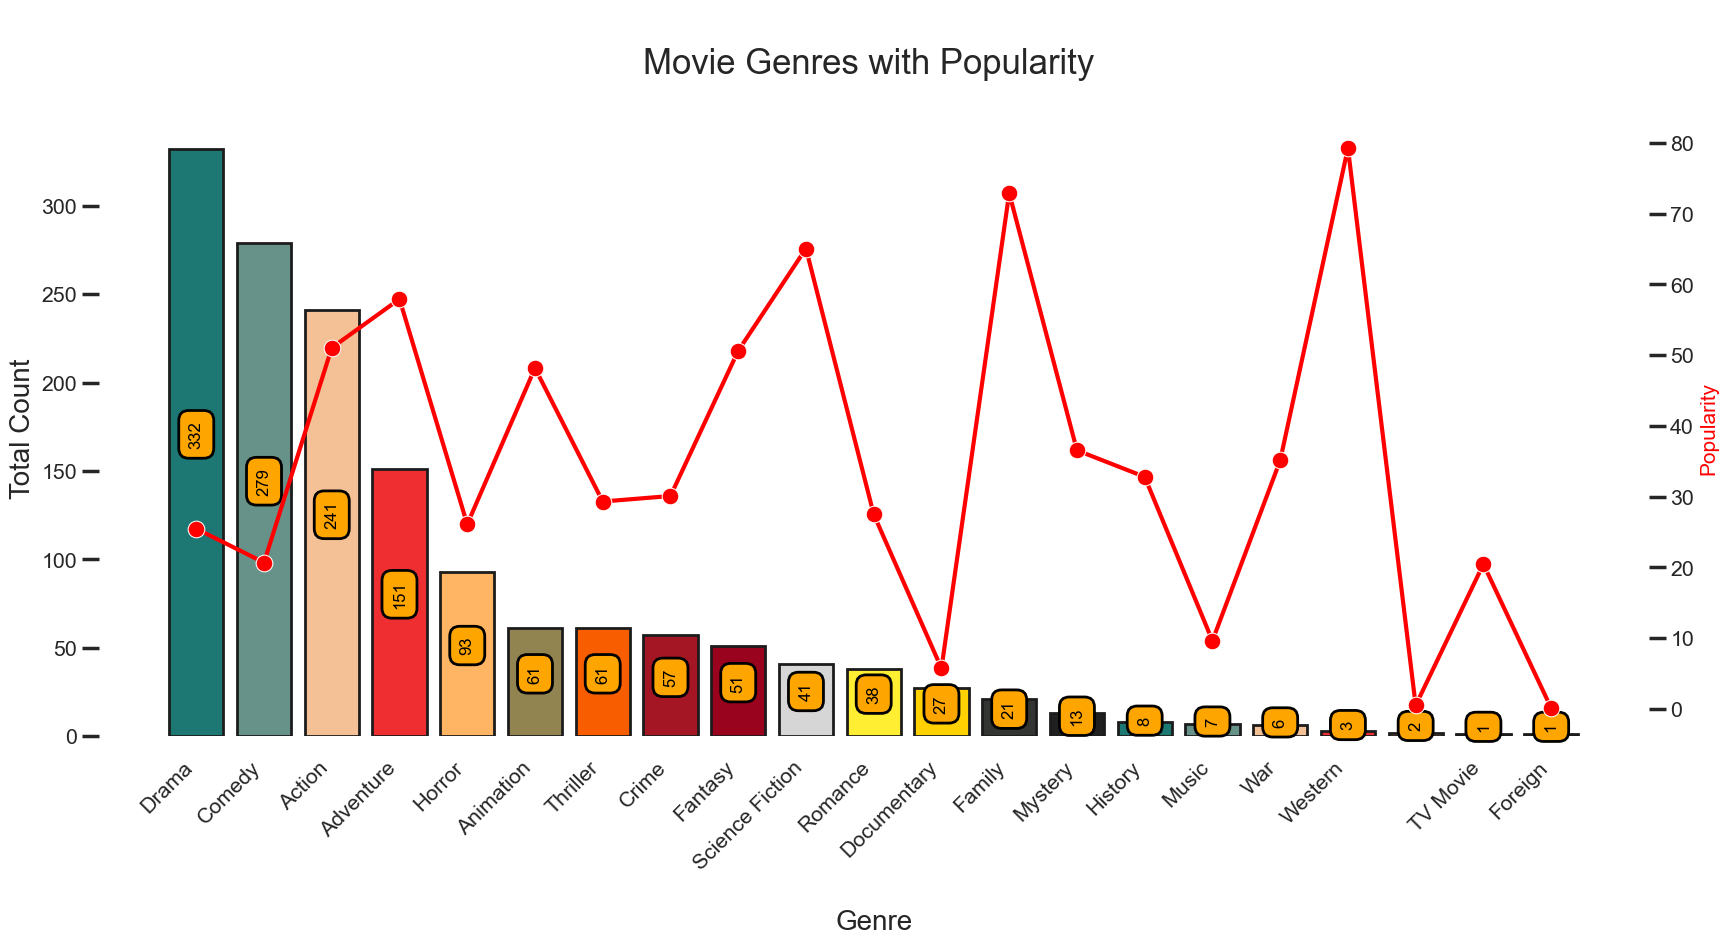

In [41]:
# Calculate popularity for each genre
genre_ratings = data_for_analysis.groupby('main_genre')['popularity'].mean().reset_index()

# Merge count and average rating data
genre_data2 = genre_counts.merge(genre_ratings, left_on='Genre', right_on='main_genre', how='left')

# Plotting the grouped bar chart
plt.subplots(figsize=(20, 8))
popularity_plot = sns.barplot(x=genre_data2['Genre'], y=genre_data2['Count'], palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=2)
popularity_plot.axes.set_title("\nMovie Genres with Popularity \n", fontsize=25)
plt.ylabel("Total Count", fontsize=20)
plt.xlabel("\nGenre", fontsize=20)
plt.xticks(rotation=45, ha='right')

# Add labels to the center of each count bar
for container in popularity_plot.containers:
    popularity_plot.bar_label(container, label_type="center", padding=6, size=12, color="black", rotation=90,
                bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

# Plotting the Popularity as a secondary y-axis
popularity_plot2 = popularity_plot.twinx()
sns.lineplot(x=genre_data2['Genre'], y=genre_data2['popularity'], color='red', marker='o', ax=popularity_plot2)
popularity_plot2.set_ylabel("Popularity", fontsize=15, color='red')

sns.despine(left=True, bottom=True)
plt.show()

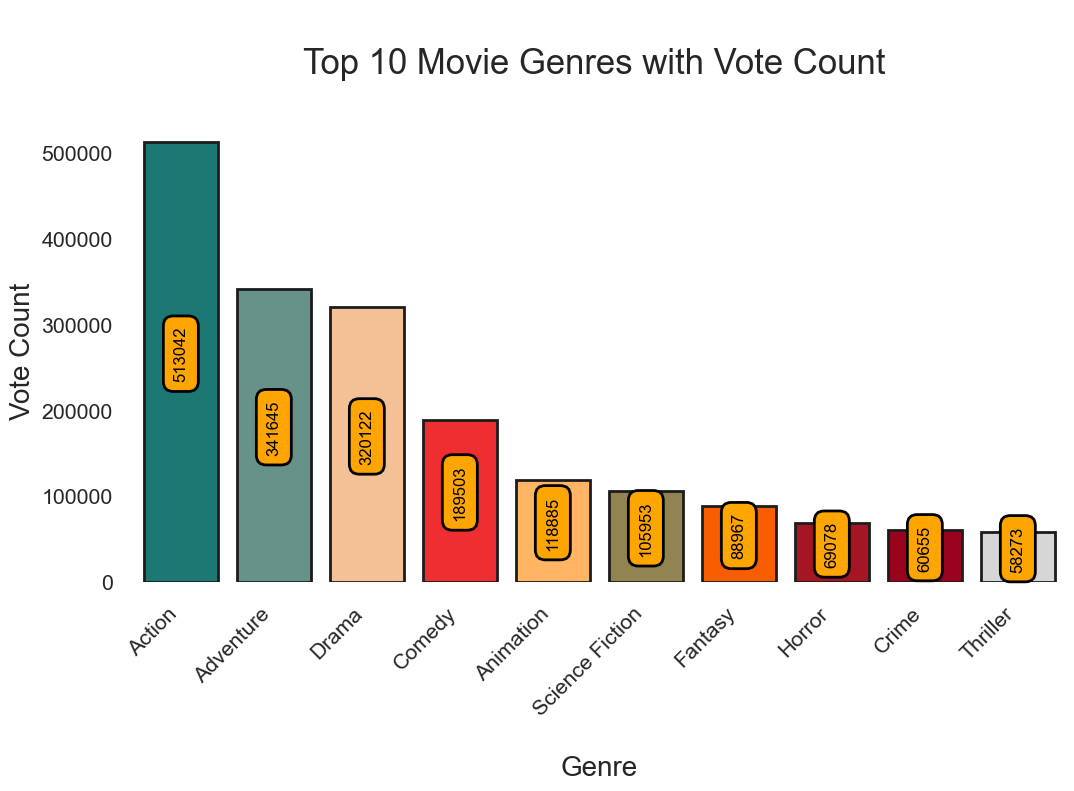

In [42]:
# Group by 'Genre' and calculate the sum of 'Vote Count' for each genre
genre_vote_counts = data_for_analysis.groupby('main_genre')['vote_count'].sum().reset_index()

# Sort the genres based on the vote counts in descending order
genre_vote_counts = genre_vote_counts.sort_values(by='vote_count', ascending=False)
genre_vote_counts=genre_vote_counts.head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
vote_count_barplot = sns.barplot(x='main_genre', y='vote_count', data=genre_vote_counts, palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=2)
vote_count_barplot.axes.set_title("\nTop 10 Movie Genres with Vote Count \n", fontsize=25)
plt.ylabel("Vote Count", fontsize=20)
plt.xlabel("\nGenre", fontsize=20)
plt.xticks(rotation=45, ha='right')

# Add labels to the center of each bar
for container in vote_count_barplot.containers:
    vote_count_barplot.bar_label(container, label_type="center", padding=6, size=12, color="black", rotation=90,
                bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

    
sns.despine(left=True, bottom=True)
plt.show()

In [43]:
# Group by 'Genre' and calculate the sum of 'Vote Count' for each genre
genre_vote_counts = data_for_analysis.groupby('main_genre')['vote_count'].sum().reset_index()

# Sort the genres based on the vote counts in descending order
genre_vote_counts = genre_vote_counts.sort_values(by='vote_count', ascending=False)
genre_vote_counts = genre_vote_counts.head(10)

# Display the result as a table
print(genre_vote_counts)

         main_genre  vote_count
1            Action      513042
2         Adventure      341645
7             Drama      320122
4            Comedy      189503
3         Animation      118885
16  Science Fiction      105953
9           Fantasy       88967
12           Horror       69078
5             Crime       60655
18         Thriller       58273


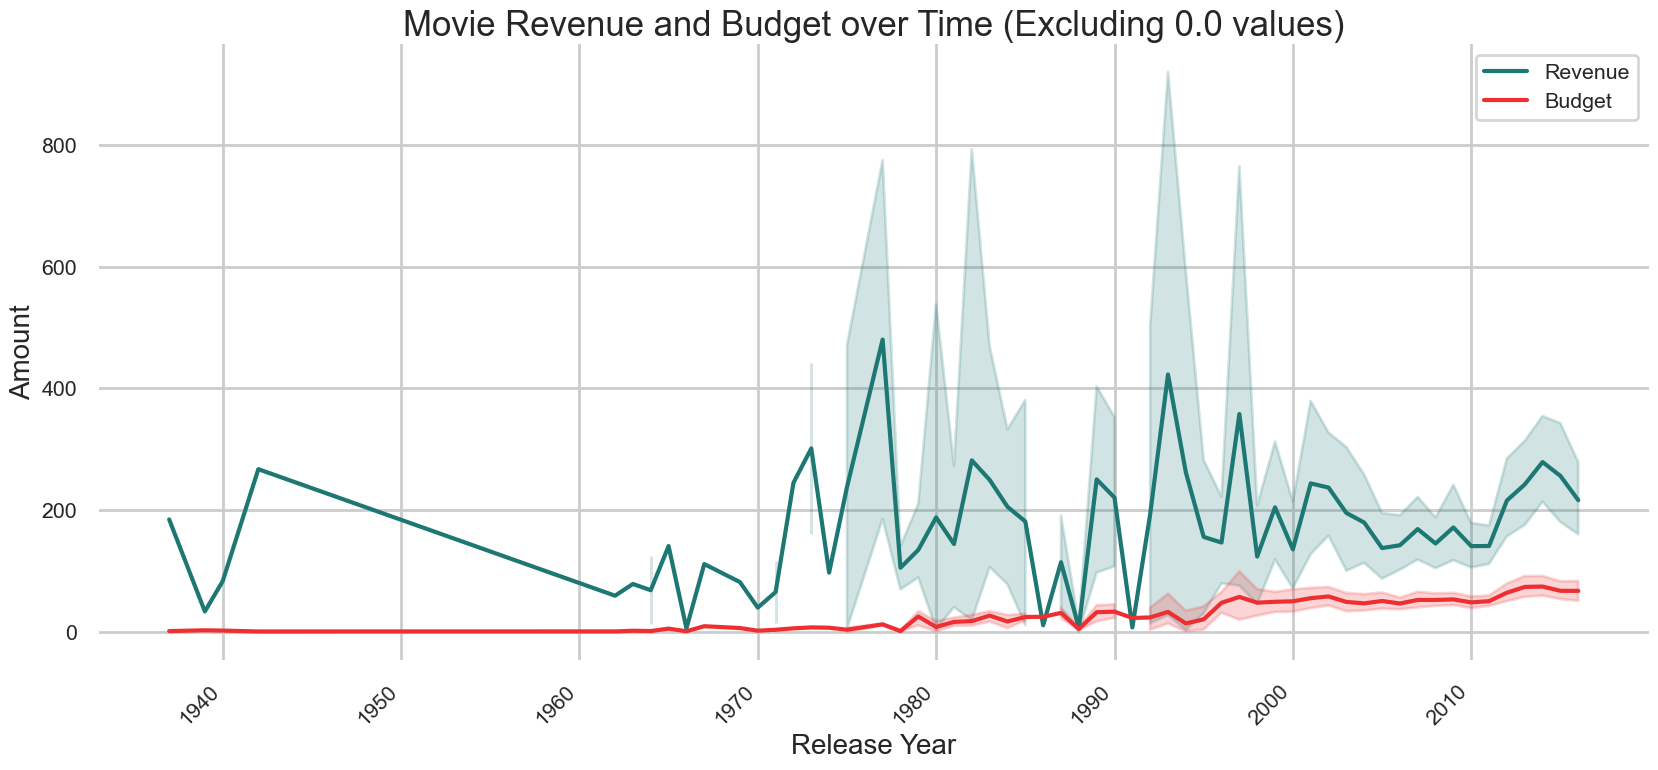

In [44]:
# Filter rows with non-zero revenue, budget, and release_date
df_filtered = data_for_analysis[(data_for_analysis['revenue'] != 0) & (data_for_analysis['budget'] != 0) & (data_for_analysis['year'] != 0)]

# Sort the DataFrame by release_date
df_filtered = df_filtered.sort_values(by='year')

# Plotting the line chart
plt.figure(figsize=(20, 8))
sns.lineplot(x='year', y='revenue', data=df_filtered, label='Revenue', color="#1d7874")
sns.lineplot(x='year', y='budget', data=df_filtered, label='Budget', color="#ee2e31")

plt.title("Movie Revenue and Budget over Time (Excluding 0.0 values)", fontsize=25)
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("Amount", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.grid(True)
sns.despine(left=True, bottom=True)
plt.show()

In [45]:
# Filter rows with non-zero revenue, budget, and release_date
df_filtered = data_for_analysis[(data_for_analysis['revenue'] != 0) & (data_for_analysis['budget'] != 0) & (data_for_analysis['year'] != 0)]

# Sort the DataFrame by release_date
df_filtered = df_filtered.sort_values(by='year')

# Display the result as a table
print(df_filtered[['year', 'revenue', 'budget']])

      year     revenue     budget
4266  1937  184.925486   1.488423
3993  1939   33.754967   2.777000
4057  1940   83.320000   2.280000
4447  1942  267.447150   0.858000
4345  1962   59.600000   0.950000
...    ...         ...        ...
2118  2016  183.936074  20.000000
2115  2016  207.945075  20.000000
982   2016   25.035950  50.000000
2918  2016   94.073028  11.500000
2173  2016   83.707310  20.000000

[1250 rows x 3 columns]


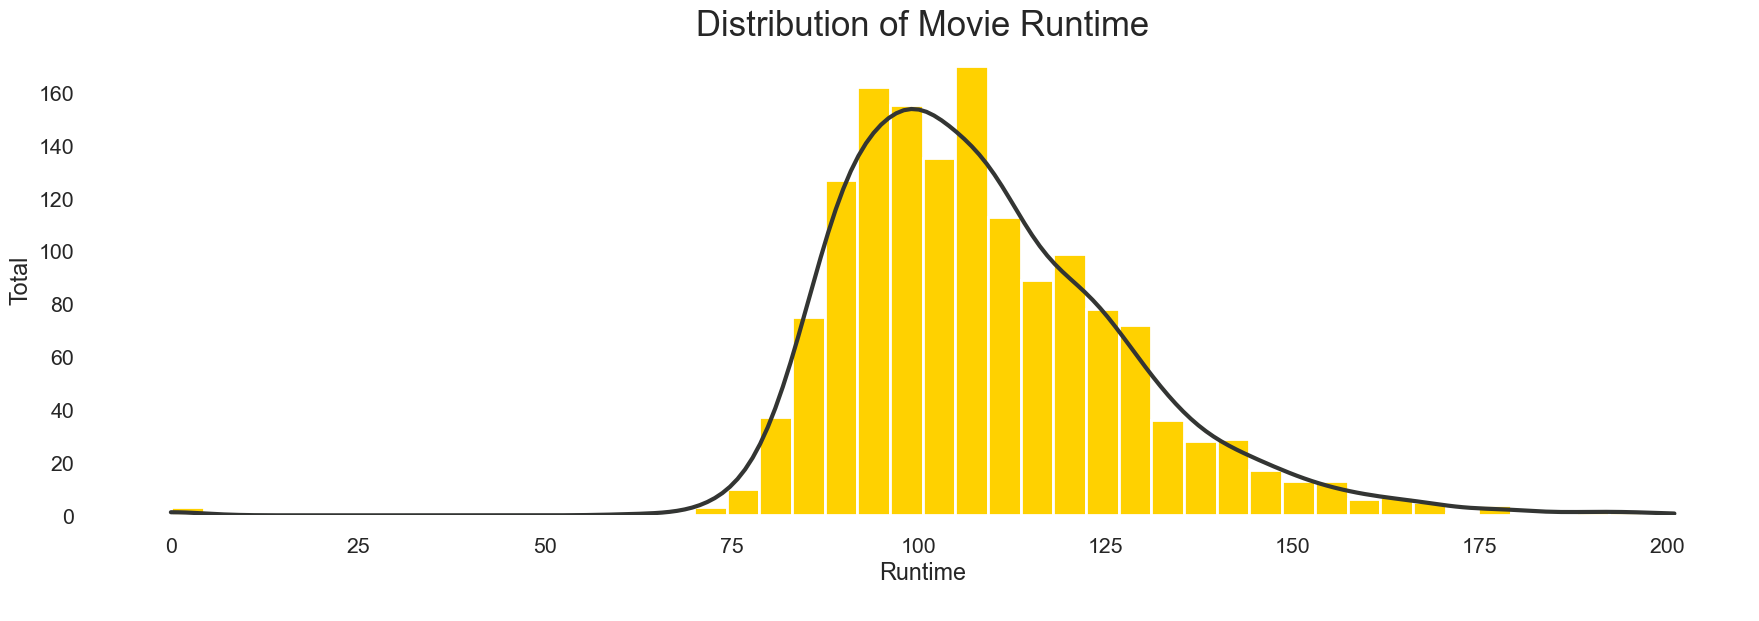

In [46]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 8))
plt.tight_layout(pad=6.0)

# Plot the distribution of movie runtime
sns.histplot(data_for_analysis['runtime'], color=palette[11], kde=True, bins='auto', alpha=1, fill=True)
edgecolor=palette[2]
ax.lines[0].set_color(palette[12])

# Add a title and labels to the axes
ax.set_title('Distribution of Movie Runtime', fontsize=25)
ax.set_xlabel('Runtime\n')
ax.set_ylabel('Total')

# Remove the spines from the plot
sns.despine(left=True, bottom=True)
plt.show()

In [47]:
# Calculate maximum, minimum, and average film runtime
max_runtime = data_for_analysis['runtime'].max()
min_runtime = data_for_analysis['runtime'].min()
avg_runtime = data_for_analysis['runtime'].mean()

print("Maximum Film Runtime:", max_runtime, "minutes")
print("Minimum Film Runtime:", min_runtime, "minutes")
print("Average Film Runtime:", round(avg_runtime, 2), "minutes")


Maximum Film Runtime: 201.0 minutes
Minimum Film Runtime: 0.0 minutes
Average Film Runtime: 108.66 minutes


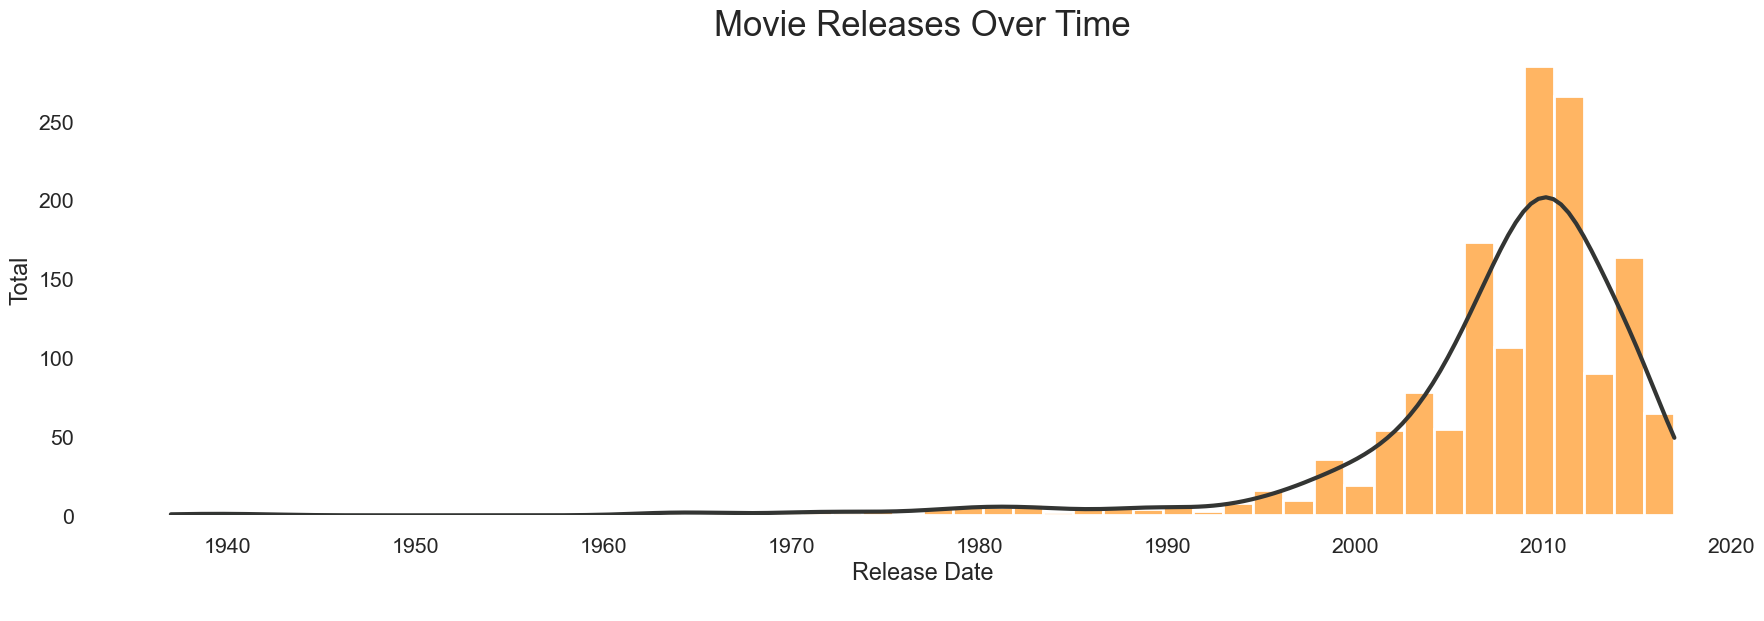

In [48]:
# Create a figure and axes
fig,ax=plt.subplots(figsize=(20,8))
plt.tight_layout(pad=6.0)

# Plot the distribution of movie runtime
sns.histplot(data_for_analysis['year'],color=palette[4],kde=True,bins=50,alpha=1,fill=True)
edgecolor=palette[12]
ax.lines[0].set_color(palette[12])

# Add a title and labels to the axes
ax.set_title('Movie Releases Over Time', fontsize=25)
ax.set_xlabel('Release Date\n')
ax.set_ylabel('Total')

# Remove the spines from the plot
sns.despine(left=True, bottom=True)
plt.show()

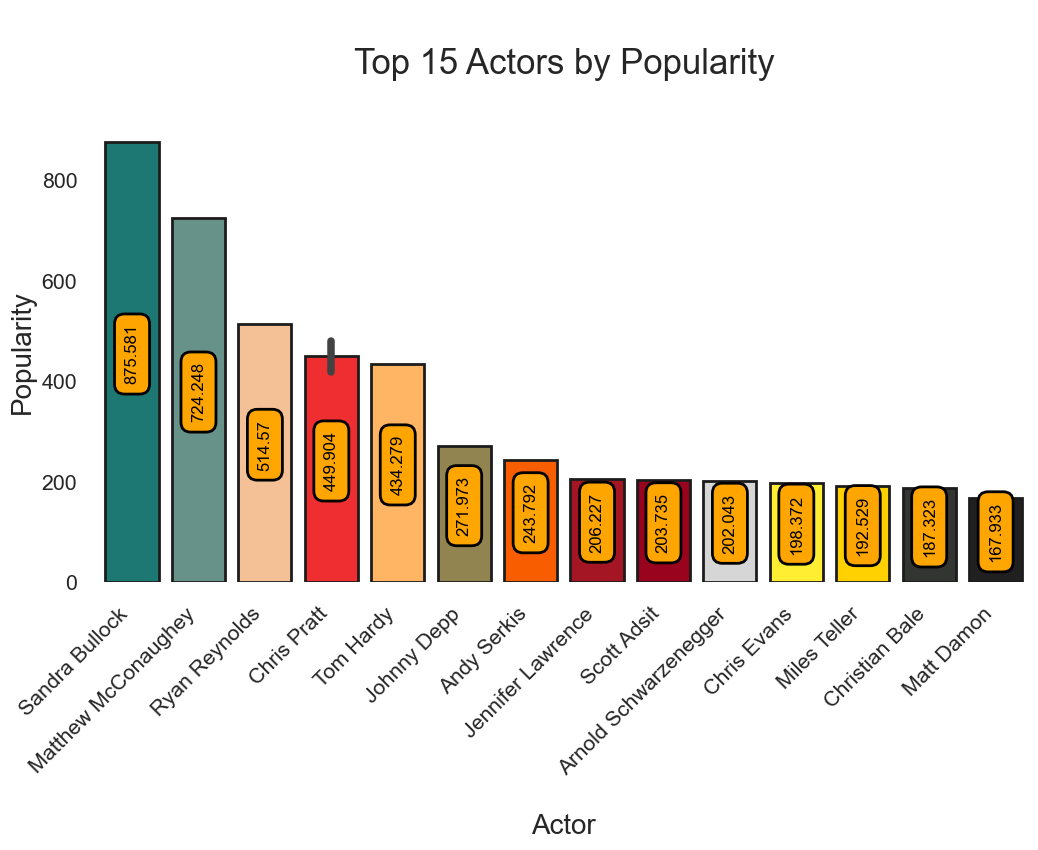

In [49]:
# Sort the DataFrame by popularity in descending order
df_sorted = data_for_analysis.sort_values(by='popularity', ascending=False)

# Select the top 15 actors based on popularity
top_15_actors = df_sorted.head(15)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
actor_barplot = sns.barplot(x='main_actor', y='popularity', data=top_15_actors, palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=2)
actor_barplot.axes.set_title("\nTop 15 Actors by Popularity\n", fontsize=25)
plt.ylabel("Popularity", fontsize=20)
plt.xlabel("\nActor", fontsize=20)
plt.xticks(rotation=45, ha='right')

# Add labels to the center of each bar
for container in actor_barplot.containers:
    actor_barplot.bar_label(container, label_type="center", padding=6, size=12, color="black", rotation=90,
                bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

In [50]:
data_for_analysis.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,tagline,title,vote_average,vote_count,movie_id,cast,director,year,main_genre,main_production_country,main_production_company,main_actor,supporting_actor
0,237.0,"Action,Adventure,Fantasy,Science Fiction",19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2787.965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington,Zoe Saldana,Sigourney Weaver",James Cameron,2009,Action,United States of America,Ingenious Film Partners,Sam Worthington,Zoe Saldana
1,300.0,"Adventure,Fantasy,Action",285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,961.000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp,Orlando Bloom,Keira Knightley",Gore Verbinski,2007,Adventure,United States of America,Walt Disney Pictures,Johnny Depp,Orlando Bloom
2,245.0,"Action,Adventure,Crime",206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",880.674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig,Christoph Waltz,Léa Seydoux",Sam Mendes,2015,Action,United Kingdom,Columbia Pictures,Daniel Craig,Christoph Waltz
3,250.0,"Action,Crime,Drama,Thriller",49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,1084.939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale,Michael Caine,Gary Oldman",Christopher Nolan,2012,Action,United States of America,Legendary Pictures,Christian Bale,Michael Caine
4,260.0,"Action,Adventure,Science Fiction",49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,284.139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch,Lynn Collins,Samantha Morton",Andrew Stanton,2012,Action,United States of America,Walt Disney Pictures,Taylor Kitsch,Lynn Collins


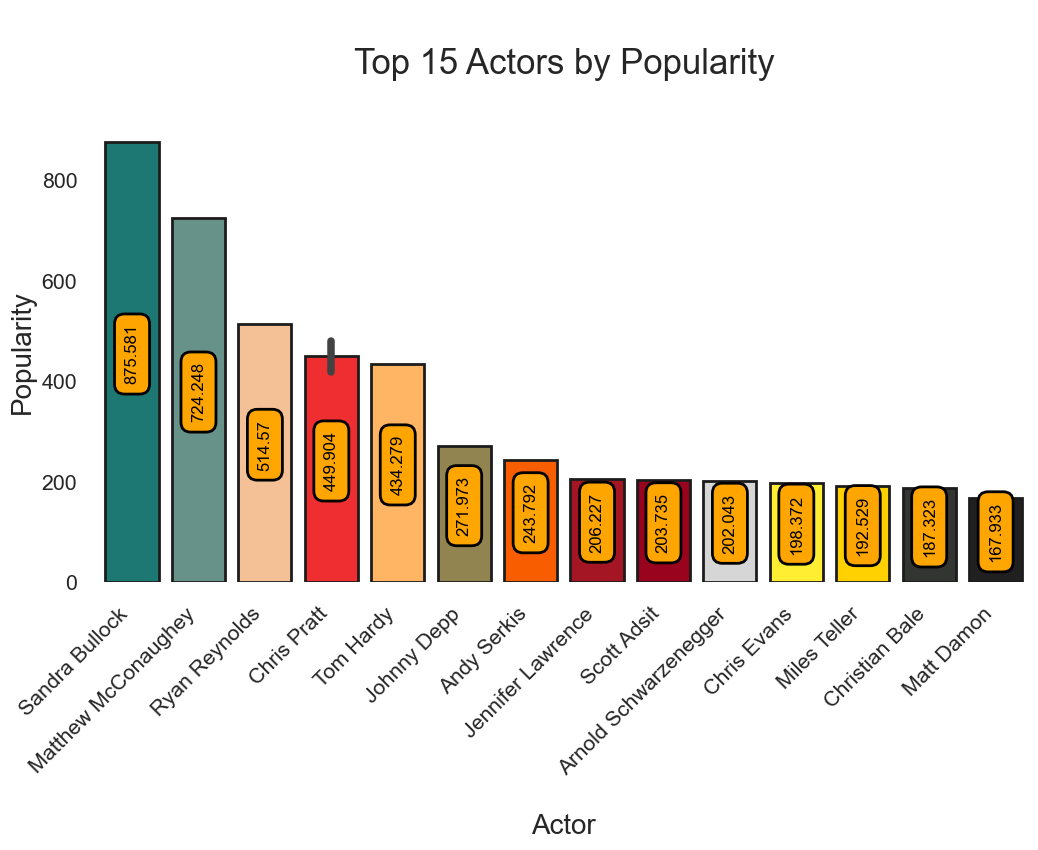

In [51]:
# Sort the DataFrame by popularity in descending order
df_sorted = data_for_analysis.sort_values(by='popularity', ascending=False)

# Select the top 15 actors based on popularity
top_15_actors = df_sorted.head(15)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
actor_barplot = sns.barplot(x='main_actor', y='popularity', data=top_15_actors, palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=2)
actor_barplot.axes.set_title("\nTop 15 Actors by Popularity\n", fontsize=25)
plt.ylabel("Popularity", fontsize=20)
plt.xlabel("\nActor", fontsize=20)
plt.xticks(rotation=45, ha='right')

# Add labels to the center of each bar
for container in actor_barplot.containers:
    actor_barplot.bar_label(container, label_type="center", padding=6, size=12, color="black", rotation=90,
                bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

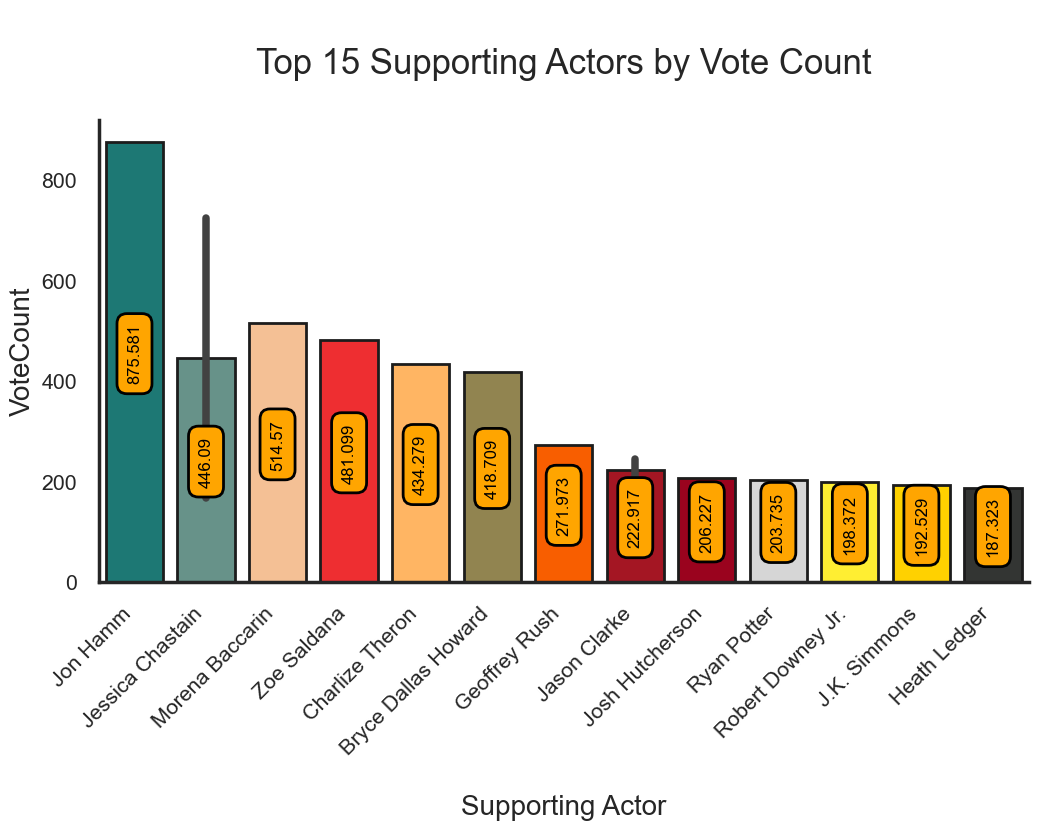

In [52]:
# Sort the DataFrame by popularity in descending order
df_sorted2 = data_for_analysis.sort_values(by='vote_count', ascending=False)

# Select the top 15 actors based on popularity
top_15_supporting_actors = df_sorted.head(15)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
actor_barplot = sns.barplot(x='supporting_actor', y='popularity', data=top_15_supporting_actors, palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=2)
actor_barplot.axes.set_title("\nTop 15 Supporting Actors by Vote Count\n", fontsize=25)
plt.ylabel("VoteCount", fontsize=20)
plt.xlabel("\nSupporting Actor", fontsize=20)
plt.xticks(rotation=45, ha='right')

# Add labels to the center of each bar
for container in actor_barplot.containers:
    actor_barplot.bar_label(container, label_type="center", padding=6, size=12, color="black", rotation=90,
                bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine()

In [53]:
# Get the top 10 production countries and their count and percentage
top_countries = data_for_analysis['main_production_country'].value_counts().nlargest(10)
top_countries_percentage = data_for_analysis['main_production_country'].value_counts(normalize=True).nlargest(10) * 100

# Combine count and percentage into a single DataFrame
top_countries_df = pd.DataFrame({'Count': top_countries, 'Percentage': top_countries_percentage})

print("Top 10 Production Countries with Count and Percentage:")
top_countries_df.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

Top 10 Production Countries with Count and Percentage:


,Count,Percentage
main_production_country,,
United States of America,991,66.331995
United Kingdom,137,9.170013
Canada,69,4.618474
Germany,58,3.882195
France,47,3.145917
Australia,26,1.740295
,19,1.271754
Spain,18,1.204819
China,15,1.004016


### Recommendation Systems

#### Approch 1 based on Overview

In [56]:
data_for_analysis['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Construct a reverse map of indices and movie titles
indices = pd.Series(data_for_analysis.index, index=data_for_analysis['title']).drop_duplicates()

# Create a TfidfVectorizer 
vectorizer = TfidfVectorizer(stop_words='english')

In [58]:
# Converting overview column into feature vectors
tfidf_matrix_overview = vectorizer.fit_transform(data_for_analysis['overview'])

#Output the shape of tfidf_matrix with overview
tfidf_matrix_overview.shape

(1494, 11160)

In [59]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim_overview = linear_kernel(tfidf_matrix_overview, tfidf_matrix_overview)

In [60]:
# Function to get recommendation using overview columns
def recommend_overview(title, cosine_sim=cosine_sim_overview):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim_overview[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data_for_analysis['title'].iloc[movie_indices]

In [61]:
# Recommending movies similar to 'The Dark Knight' using on different approches.
print('Based on Overview:-\n',recommend_overview('The Avengers'))
print()

Based on Overview:-
 2766                          Room
778                      Meet Dave
1152               American Hustle
2871               Project Almanac
2539            The Woman in Black
342                   Men in Black
1181                 Vantage Point
286                         Eraser
666                I, Frankenstein
46      X-Men: Days of Future Past
Name: title, dtype: object



In [64]:
data_for_analysis.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,tagline,title,vote_average,vote_count,movie_id,cast,director,year,main_genre,main_production_country,main_production_company,main_actor,supporting_actor
0,237.0,"Action,Adventure,Fantasy,Science Fiction",19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2787.965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington,Zoe Saldana,Sigourney Weaver",James Cameron,2009,Action,United States of America,Ingenious Film Partners,Sam Worthington,Zoe Saldana
1,300.0,"Adventure,Fantasy,Action",285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,961.000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp,Orlando Bloom,Keira Knightley",Gore Verbinski,2007,Adventure,United States of America,Walt Disney Pictures,Johnny Depp,Orlando Bloom
2,245.0,"Action,Adventure,Crime",206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",880.674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig,Christoph Waltz,Léa Seydoux",Sam Mendes,2015,Action,United Kingdom,Columbia Pictures,Daniel Craig,Christoph Waltz
3,250.0,"Action,Crime,Drama,Thriller",49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,1084.939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale,Michael Caine,Gary Oldman",Christopher Nolan,2012,Action,United States of America,Legendary Pictures,Christian Bale,Michael Caine
4,260.0,"Action,Adventure,Science Fiction",49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,284.139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch,Lynn Collins,Samantha Morton",Andrew Stanton,2012,Action,United States of America,Walt Disney Pictures,Taylor Kitsch,Lynn Collins


### Approch 3 based on multiple features

In [62]:
# Concatinate all
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['director']

In [63]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,tagline,title,vote_average,vote_count,movie_id,cast,director,year,tags
0,237.0,"Action,Adventure,Fantasy,Science Fiction",19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2787.965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington,Zoe Saldana,Sigourney Weaver",James Cameron,2009,"In the 22nd century, a paraplegic Marine is di..."
1,300.0,"Adventure,Fantasy,Action",285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,961.000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp,Orlando Bloom,Keira Knightley",Gore Verbinski,2007,"Captain Barbossa, long believed to be dead, ha..."
2,245.0,"Action,Adventure,Crime",206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",880.674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig,Christoph Waltz,Léa Seydoux",Sam Mendes,2015,A cryptic message from Bond’s past sends him o...
3,250.0,"Action,Crime,Drama,Thriller",49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,1084.939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale,Michael Caine,Gary Oldman",Christopher Nolan,2012,Following the death of District Attorney Harve...
4,260.0,"Action,Adventure,Science Fiction",49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,284.139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch,Lynn Collins,Samantha Morton",Andrew Stanton,2012,"John Carter is a war-weary, former military ca..."


In [65]:
movies.iloc[0]['tags']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.Action,Adventure,Fantasy,Science Fictionculture clash,future,space war,space colony,society,space travel,futuristic,romance,space,alien,tribe,alien planet,cgi,marine,soldier,battle,love affair,anti war,power relations,mind and soul,3dSam Worthington,Zoe Saldana,Sigourney WeaverJames Cameron'

In [66]:
# droping those extra columns
new_df = movies[['id','title','tags']]

In [67]:
new_df.head()

,id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [68]:
# Converting to lower case
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

In [69]:
new_df.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [70]:
import nltk
from nltk.stem import PorterStemmer

In [71]:
ps = PorterStemmer()

def stems(text):
    T = []
    
    for i in text.split():
        T.append(ps.stem(i))
    
    return " ".join(T)

In [72]:
new_df['tags'] = new_df['tags'].apply(stems)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000,stop_words='english')

vector = cv.fit_transform(new_df['tags']).toarray()

In [74]:
from sklearn.metrics.pairwise import cosine_similarity

In [75]:
similarity = cosine_similarity(vector)

In [76]:
similarity.shape

(1494, 1494)

In [77]:
new_df[new_df['title'] == 'The Lego Movie'].index[0]

744

In [78]:
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)

In [79]:
recommend('Spider-Man 3')

Spider-Man 2
Spider-Man
The Amazing Spider-Man 2
The Amazing Spider-Man
Iron Man 2


In [80]:
import pickle

In [81]:
pickle.dump(new_df,open('artifacts/movie_list.pkl','wb'))
pickle.dump(similarity,open('artifacts/similarity.pkl','wb'))

In [ ]:
----------------------------------------End----------------------------------------------